# Example `beacon_api_eth_v1_events_block` notebook
This notebook allows for setting a date range at the top to download and analyze Parquet files for `beacon_api_eth_v1_events_block` data.

```bash
pip install pandas matplotlib pyarrow
```

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta

## Set Date Range
Define the start and end dates for the analysis.

In [2]:
# Set the date range
start_date = datetime(2024, 4, 1)
end_date = datetime(2024, 4, 2)

## Generate URLs and Download Data
Generate URLs for the date range and download the corresponding Parquet files.

In [3]:
# Function to generate dates
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days) + 1):
        yield start_date + timedelta(n)

# Generate URLs without zero-padding month and day
base_url = "https://data.ethpandaops.io/xatu/mainnet/databases/default/beacon_api_eth_v1_events_block/"
urls = [f"{base_url}{date.year}/{date.month}/{date.day}.parquet" for date in daterange(start_date, end_date)]

# Download, load, and concatenate Parquet data
dfs = []
for url in urls:
    print(f"Downloading and loading: {url}")
    r = requests.get(url)
    with open('temp.parquet', 'wb') as f:
        f.write(r.content)
    df = pd.read_parquet('temp.parquet')
    df['slot_start_date_time'] = pd.to_datetime(df['slot_start_date_time'], unit='s')
    dfs.append(df)

# Concatenate all DataFrames into a single one
df_combined = pd.concat(dfs)


## Perform Analysis
Calculate the median `propagation_slot_start_diff` per `slot_start_date_time` on the combined dataset.

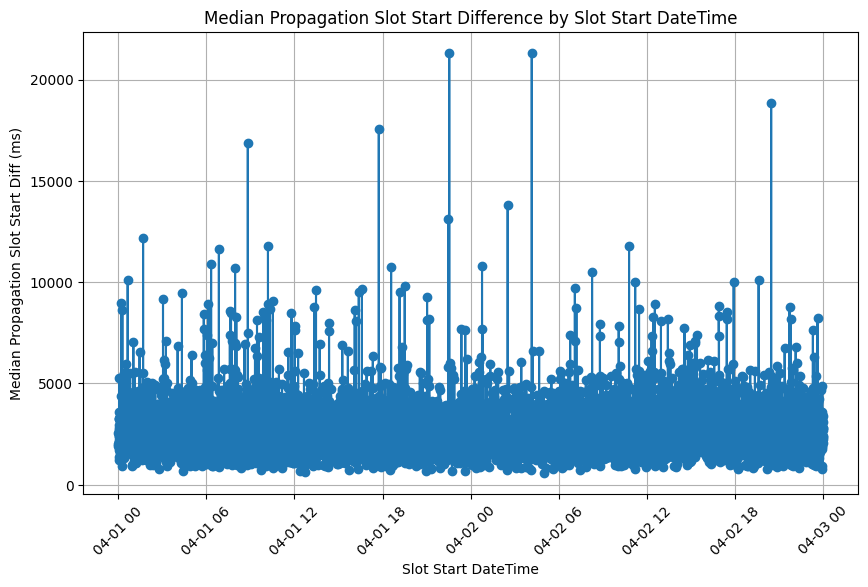

In [4]:
# Group by slot_start_date_time and calculate median propagation_slot_start_diff
grouped = df_combined.groupby('slot_start_date_time')['propagation_slot_start_diff'].median().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(grouped['slot_start_date_time'], grouped['propagation_slot_start_diff'], marker='o')
plt.title('Median Propagation Slot Start Difference by Slot Start DateTime')
plt.xlabel('Slot Start DateTime')
plt.ylabel('Median Propagation Slot Start Diff (ms)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()